# Notebook to investigate the correlation between the length of the original and the lengths of the perturbed datasets

Results at a glance:
* `Original vs. function words -- r-value: 0.7508324004278204 | p-value: 1.1099252616465896e-114`

* `Original vs. nouns -- r-value: 0.5562589894292461 | p-value: 3.240352455751456e-52`

* `Function words vs. nouns -- r-value: 0.31260540640127554 | p-value: 1.1130064445581949e-15`

In [1]:
save = False #currently notebook is not set up to save any figures anyways.

In [2]:
from os.path import abspath
import os
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr

In [3]:
print(os.getcwd())

/rdma/vast-rdma/vast/cpl/ckauf/perturbed-neural-nlp/analysis


In [4]:
savedir = abspath('../ressources/scrambled_stimuli_dfs')
print(savedir)

/rdma/vast-rdma/vast/cpl/ckauf/perturbed-neural-nlp/ressources/scrambled_stimuli_dfs


# Load datasets & within-dataset length stats

### Original

In [5]:
with open(os.path.join(savedir, "stimuli_Original.pkl"), "rb") as f:
    df_original = pickle.load(f)
original_sentences = list(df_original["sentence"])
df_original.head()

Loading lookup from /om2/user/ckauf/anaconda/envs/perturbedenv/lib/python3.6/site-packages/brainio_collection/lookup.csv
/rdma/vast-rdma/vast/cpl/ckauf/perturbed-neural-nlp/neural_nlp/../ressources/stimuli


 We're running in the NEW version of the implementations.py script.




/om2/user/ckauf/anaconda/envs/perturbedenv/lib/python3.6/site-packages/brainio_base/assemblies.py:224: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  xr_data.set_index(append=True, inplace=True, **coords_d)


,sentence,sentence_num,stimulus_id,experiment,story,passage_index,passage_label,passage_category
0,beekeeping encourages the conservation of loca...,0,243sentences.0,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
1,it is in every beekeeper's interest to conserv...,1,243sentences.1,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
2,as a passive form of agriculture it does not r...,2,243sentences.2,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
3,beekeepers also discourage the use of pesticid...,3,243sentences.3,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
4,artisanal beekeepers go to extremes for their ...,4,243sentences.4,243sentences,243sentences.beekeeping,2,beekeeping,beekeeping


In [6]:
original_lengths = [len(elm.split()) for elm in original_sentences]
print(f"Original | {original_lengths[:10]}\n")
print(f"Min: {np.min(original_lengths)}\nMax: {np.max(original_lengths)}\nMean: {np.mean(original_lengths)}\nMedian: {np.median(original_lengths)}\nStd: {np.std(original_lengths)}" )

Original | [7, 13, 20, 15, 15, 10, 11, 16, 15, 11]

Min: 5
Max: 20
Mean: 12.328548644338118
Median: 12.0
Std: 2.526516150448879


### Function words

In [7]:
with open(os.path.join(savedir, "stimuli_functionwords.pkl"), "rb") as f:
    df_fn = pickle.load(f)
fn_sentences = list(df_fn["sentence"])
df_fn.head()

,sentence,sentence_num,stimulus_id,experiment,story,passage_index,passage_label,passage_category
0,the of.,0,243sentences.0,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
1,in every to that.,1,243sentences.1,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
2,as a of that to for.,2,243sentences.2,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
3,the of on because could the.,3,243sentences.3,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
4,to for but worth the.,4,243sentences.4,243sentences,243sentences.beekeeping,2,beekeeping,beekeeping


In [8]:
fn_lengths = [len(elm.split()) for elm in fn_sentences]
print(f"Function words | {fn_lengths[:10]}\n")
print(f"Min: {np.min(fn_lengths)}\nMax: {np.max(fn_lengths)}\nMean: {np.mean(fn_lengths)}\nMedian: {np.median(fn_lengths)}\nStd: {np.std(fn_lengths)}")

Function words | [2, 4, 6, 6, 5, 3, 3, 5, 7, 3]

Min: 1
Max: 10
Mean: 4.130781499202552
Median: 4.0
Std: 1.621858227513163


### Nouns

In [9]:
with open(os.path.join(savedir, "stimuli_nouns.pkl"), "rb") as f:
    df_nouns = pickle.load(f)
nouns_sentences = list(df_nouns["sentence"])
df_nouns.head()

,sentence,sentence_num,stimulus_id,experiment,story,passage_index,passage_label,passage_category
0,conservation habitats.,0,243sentences.0,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
1,it beekeeper's interest plants pollen.,1,243sentences.1,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
2,form agriculture it vegetation way crops.,2,243sentences.2,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
3,beekeepers use pesticides crops they honeybees.,3,243sentences.3,243sentences,243sentences.beekeeping,1,beekeeping,beekeeping
4,beekeepers their craft their product effort.,4,243sentences.4,243sentences,243sentences.beekeeping,2,beekeeping,beekeeping


In [10]:
nouns_lengths = [len(elm.split()) for elm in nouns_sentences]
print(f"Nouns | {nouns_lengths[:10]}\n")
print(f"Min: {np.min(nouns_lengths)}\nMax: {np.max(nouns_lengths)}\nMean: {np.mean(nouns_lengths)}\nMedian: {np.median(nouns_lengths)}\nStd: {np.std(nouns_lengths)}")

Nouns | [2, 5, 6, 6, 6, 5, 5, 5, 4, 6]

Min: 1
Max: 9
Mean: 4.347687400318979
Median: 4.0
Std: 1.2566912752512462


# Correlation analyses

### Original vs. function words

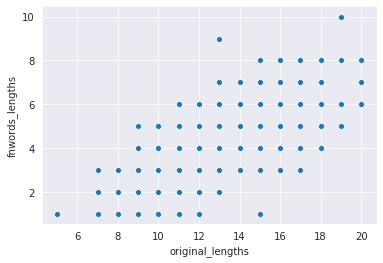

In [11]:
sns.set_style('darkgrid')
plot_df = pd.DataFrame({
    "original_lengths" : original_lengths,
    "fnwords_lengths" : fn_lengths
})
ax = sns.scatterplot(data=plot_df, x="original_lengths", y="fnwords_lengths")

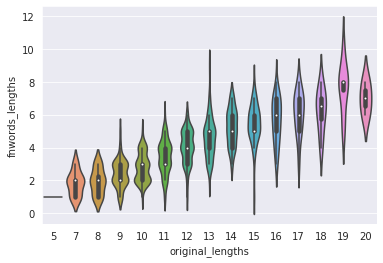

In [12]:
ax2 = sns.violinplot(x="original_lengths", y="fnwords_lengths", data=plot_df)

#### Stats

In [13]:
rvalue, pvalue = pearsonr(original_lengths, fn_lengths)
print(f"r-value: {rvalue} | p-value: {pvalue}\n") # (Pearson’s correlation coefficient, 2-tailed p-value)

print(linregress(original_lengths, fn_lengths))
# slope : slope of the regression line
# intercept : intercept of the regression line
# r-value : correlation coefficient
# p-value : two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero
# stderr : Standard error of the estimate

r-value: 0.7508324004278204 | p-value: 1.1099252616465896e-114

LinregressResult(slope=0.48198532429763635, intercept=-1.8113980172579414, rvalue=0.7508324004278211, pvalue=1.1099252616468282e-114, stderr=0.01695972759870034)


### Original vs. nouns

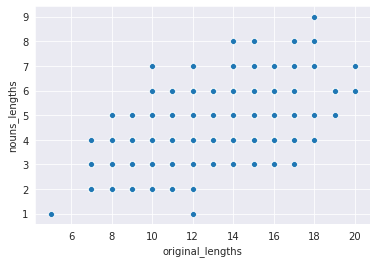

In [14]:
plot_df = pd.DataFrame({
    "original_lengths" : original_lengths,
    "nouns_lengths" : nouns_lengths
})
ax = sns.scatterplot(data=plot_df, x="original_lengths", y="nouns_lengths")

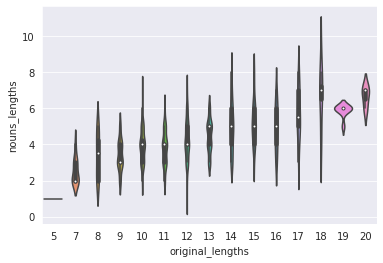

In [15]:
ax2 = sns.violinplot(x="original_lengths", y="nouns_lengths", data=plot_df)

#### Stats

In [16]:
rvalue, pvalue = pearsonr(original_lengths, nouns_lengths)
print(f"r-value: {rvalue} | p-value: {pvalue}\n") # (Pearson’s correlation coefficient, 2-tailed p-value)

print(linregress(original_lengths, nouns_lengths))

r-value: 0.5562589894292461 | p-value: 3.240352455751456e-52

LinregressResult(slope=0.2766836929467525, intercept=0.9365790327298296, rvalue=0.5562589894292457, pvalue=3.2403524557549643e-52, stderr=0.016533782989469954)


### Function words vs. nouns

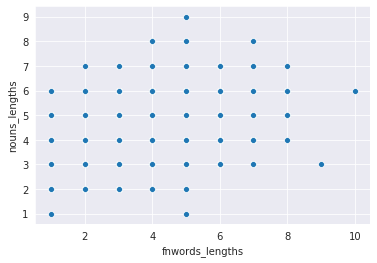

In [17]:
plot_df = pd.DataFrame({
    "fnwords_lengths" : fn_lengths,
    "nouns_lengths" : nouns_lengths
})
ax = sns.scatterplot(data=plot_df, x="fnwords_lengths", y="nouns_lengths")

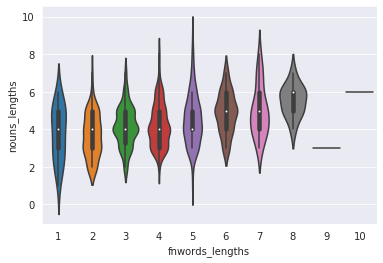

In [18]:
ax2 = sns.violinplot(x="fnwords_lengths", y="nouns_lengths", data=plot_df)

#### Stats

In [19]:
rvalue, pvalue = pearsonr(fn_lengths, nouns_lengths)
print(f"r-value: {rvalue} | p-value: {pvalue}\n") # (Pearson’s correlation coefficient, 2-tailed p-value)

print(linregress(fn_lengths, nouns_lengths))

r-value: 0.31260540640127554 | p-value: 1.1130064445581949e-15

LinregressResult(slope=0.2422212251086941, intercept=3.347124444925809, rvalue=0.31260540640127554, pvalue=1.1130064445590882e-15, stderr=0.029440545543875738)
